In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [2]:
from sklearn.model_selection import RandomizedSearchCV

In [4]:
#pip install xgboost

In [3]:
df_train = pd.read_csv(r"C:\Users\ravee\OneDrive\Desktop\train.csv\train.csv")

In [4]:
df_train.head(5)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [5]:
df_train.shape

(188533, 13)

In [8]:
df_test = pd.read_csv(r"C:\Users\ravee\OneDrive\Desktop\test.csv\test.csv")

In [9]:
df_test.head(5)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [10]:
df_test.shape

(125690, 12)

In [11]:
df_train.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [12]:
df_test.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
dtype: object

In [13]:
df_train = df_train.drop(columns=['ext_col','int_col'],inplace=False)

In [14]:
df_test = df_test.drop(columns=['ext_col','int_col'],inplace=False)

In [15]:
df_train.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
accident         2452
clean_title     21419
price               0
dtype: int64

In [16]:
df_test.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
accident         1632
clean_title     14239
dtype: int64

In [17]:
df_train['accident'].value_counts(dropna=False)

None reported                             144514
At least 1 accident or damage reported     41567
NaN                                         2452
Name: accident, dtype: int64

In [18]:
df_train['clean_title'].value_counts(dropna=False)

Yes    167114
NaN     21419
Name: clean_title, dtype: int64

In [19]:
df_train['accident'].fillna('None reported',inplace=True)

In [20]:
df_train['accident'].value_counts(dropna=False)

None reported                             146966
At least 1 accident or damage reported     41567
Name: accident, dtype: int64

In [21]:
df_test['accident'].fillna('None reported',inplace=True)

In [22]:
df_test['accident'].value_counts(dropna=False)

None reported                             97895
At least 1 accident or damage reported    27795
Name: accident, dtype: int64

In [23]:
df_train['clean_title'].fillna('No',inplace=True)

In [24]:
df_train['clean_title'].value_counts(dropna=False)

Yes    167114
No      21419
Name: clean_title, dtype: int64

In [25]:
df_test['clean_title'].fillna('No',inplace=True)

In [26]:
df_test['clean_title'].value_counts(dropna=False)

Yes    111451
No      14239
Name: clean_title, dtype: int64

In [27]:
df_train['fuel_type'].value_counts()

Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: fuel_type, dtype: int64

In [28]:
df_test['fuel_type'].fillna('Missing',inplace=True)

In [29]:
df_train['fuel_type'].fillna('Missing',inplace=True)

In [30]:
df_train.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
accident        0
clean_title     0
price           0
dtype: int64

In [31]:
df_test.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
accident        0
clean_title     0
dtype: int64

In [33]:
ID = df_test['id'].copy()

In [34]:
df_train = df_train.drop(columns='id')
df_test = df_test.drop(columns='id')

In [35]:
#calculate the correlation matrix
correlation_matrix = df_train.corr()

C:\Users\ravee\AppData\Local\Temp\ipykernel_8556\1707456923.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr()


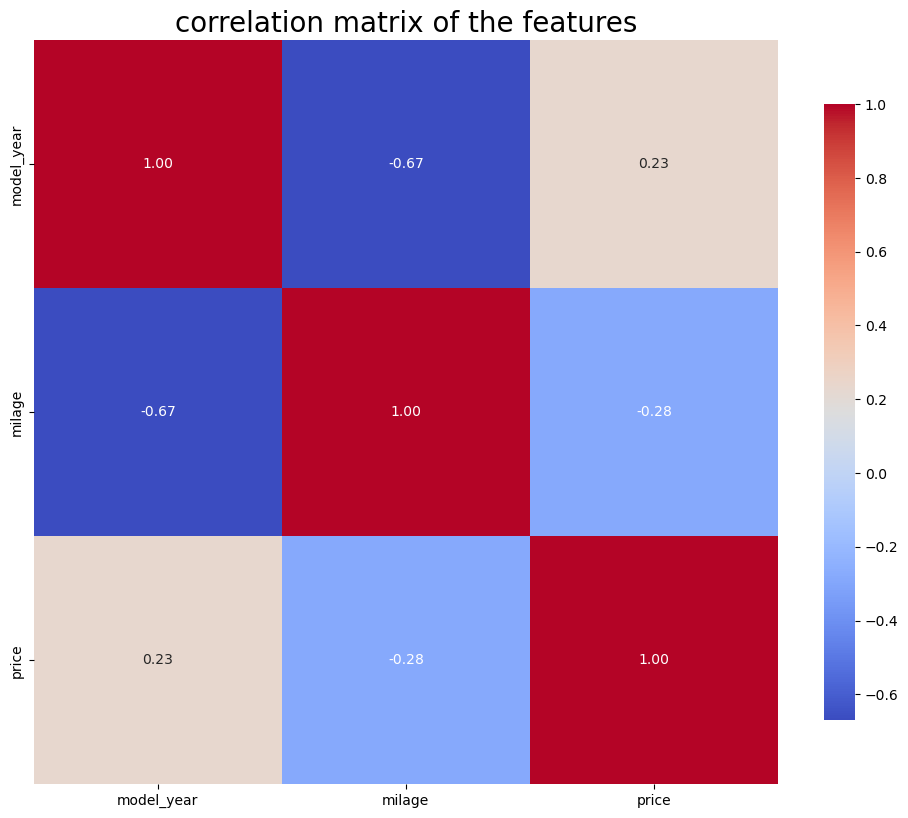

In [36]:
#visualize the correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f',cmap='coolwarm',square=True,cbar_kws={'shrink':.8})
plt.title('correlation matrix of the features',size=20)
plt.show()

In [37]:
correlation_matrix = df_test.corr()

C:\Users\ravee\AppData\Local\Temp\ipykernel_8556\147994430.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_test.corr()


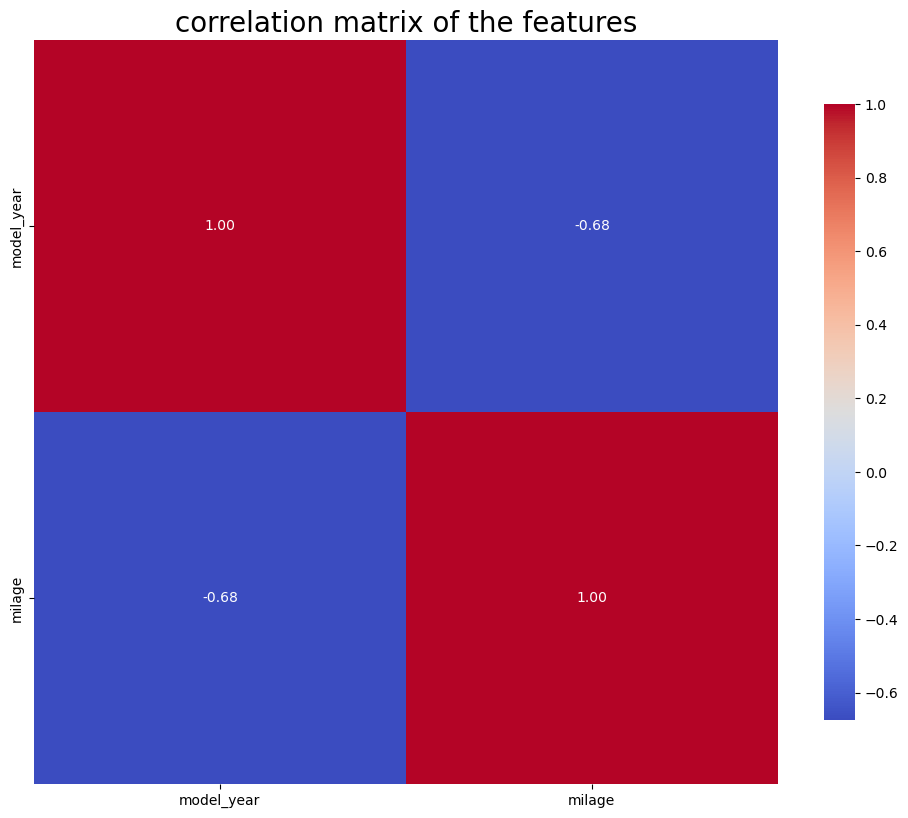

In [38]:
#visualize the correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f',cmap='coolwarm',square=True,cbar_kws={'shrink':.8})
plt.title('correlation matrix of the features',size=20)
plt.show()

In [38]:
#since model year and mileage are highly correlated , we will drop one of the column.

In [39]:
df_train = df_train.drop(columns=['model_year'],inplace=False)

In [40]:
df_test = df_test.drop(columns=['model_year'],inplace=False)

In [41]:
df_test.shape

(125690, 8)

# Preprocessing numerical column

In [42]:
def detect_outliers_iqr(df):
    outliers = pd.DataFrame()
    for column in df.select_dtypes(include=['int64']):
        Q1 = df[column].quantile(0.01)
        Q3 = df[column].quantile(0.99)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = ((df[column] < lower_bound) |(df[column] > upper_bound))
    return outliers

In [43]:
outliers_iqr = detect_outliers_iqr(df_train)
print(outliers_iqr.sum())

milage      0
price     275
dtype: int64


In [44]:
outliers_iqr1 = detect_outliers_iqr(df_test)
print(outliers_iqr1.sum())

milage    0
dtype: int64


In [45]:
def plot_boxplot(df, title):
    plt.figure(figsize=(15,8))
    sns.boxplot(data=df.select_dtypes(include=['float64','int64']))
    plt.title(f'Boxplot of {title} Data',fontsize=16)
    plt.xticks(rotation=360, fontsize=12)
    plt.xlabel('Features',fontsize=14)
    plt.ylabel('Values',fontsize=14)
    plt.show()

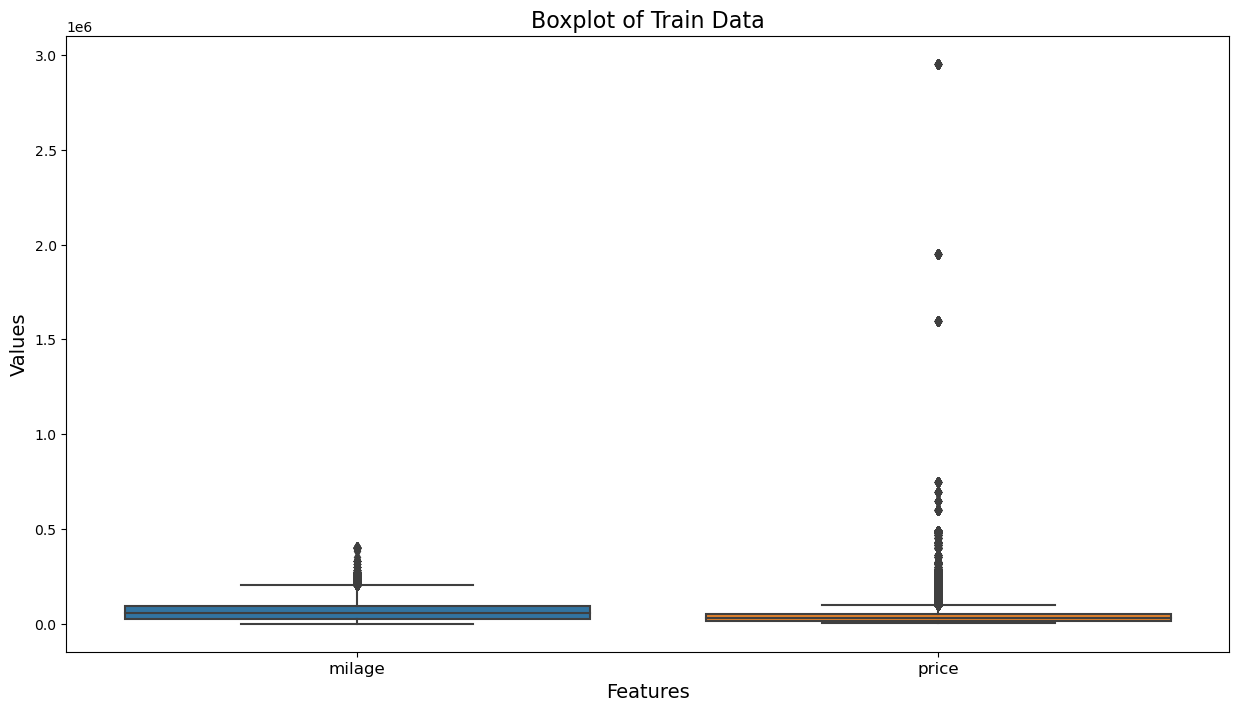

In [46]:
plot_boxplot(df_train, 'Train')

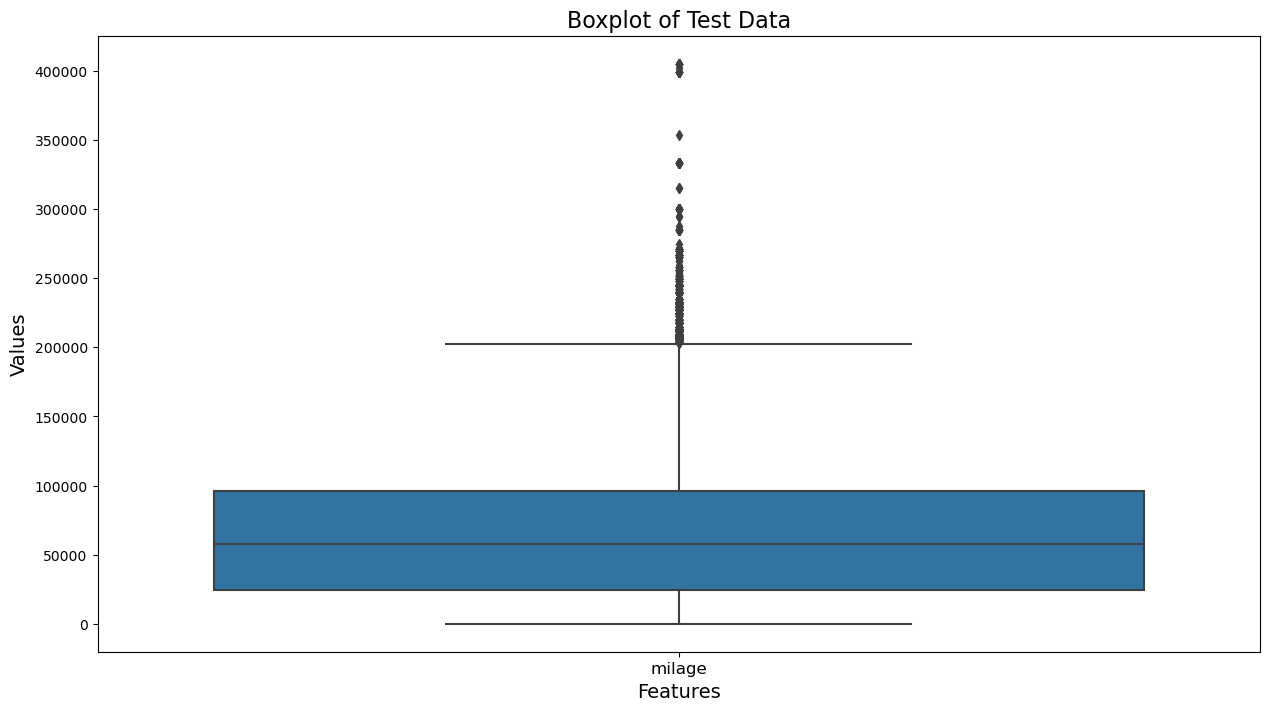

In [47]:
plot_boxplot(df_test, 'Test')

In [48]:
# Q1 = df_test['milage'].quantile(0.25)
# Q3 = df_test['milage'].quantile(0.75)
# IQR = Q3 - Q1
# # Step 3: Define the lower and upper bound for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# # Step 4: Remove outliers
# df_test = df_test[(df_test['milage'] >= lower_bound) & (df_test['milage'] <= upper_bound)]

In [49]:
df_test.shape

(125690, 8)

In [50]:
#plot_boxplot(df_test1, 'Test')

# Data Splitting

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train = df_train.drop(columns='price')

In [53]:
y_train = df_train['price'].copy()

In [54]:
x_train.columns

Index(['brand', 'model', 'milage', 'fuel_type', 'engine', 'transmission',
       'accident', 'clean_title'],
      dtype='object')

In [55]:
y_train.head(5)

0     4200
1     4999
2    13900
3    45000
4    97500
Name: price, dtype: int64

In [56]:
x_test = df_test.copy()

In [57]:
x_test.shape

(125690, 8)

In [58]:
X_TRAIN, X_VAL , Y_TRAIN , Y_VAL = train_test_split(x_train , y_train , random_state =42, test_size=0.2, stratify = y_train , shuffle=df_train)

In [59]:
X_TRAIN.shape, X_VAL.shape , Y_TRAIN.shape , Y_VAL.shape, x_test.shape

((150826, 8), (37707, 8), (150826,), (37707,), (125690, 8))

# Encoding

In [60]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
X_TRAIN_category = X_TRAIN.select_dtypes('object')
X_VAL_category = X_VAL.select_dtypes('object')
X_TEST_category = x_test.select_dtypes('object')

In [62]:
enc = OneHotEncoder(handle_unknown = 'ignore',sparse_output = False).fit(X_TRAIN_category)

In [63]:
X_TRAIN_OH = enc.transform(X_TRAIN_category)
X_VAL_OH = enc.transform(X_VAL_category)
X_TEST_OH = enc.transform(X_TEST_category)

# Scaling

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
X_TRAIN_conti = X_TRAIN.select_dtypes('int64')
X_VAL_conti = X_VAL.select_dtypes('int64')
X_TEST_conti = x_test.select_dtypes('int64')

In [66]:
scale = StandardScaler().fit(X_TRAIN_conti)
X_TRAIN_STS = scale.transform(X_TRAIN_conti)
X_VAL_STS = scale.transform(X_VAL_conti)
X_TEST_STS = scale.transform(X_TEST_conti)

# Preparing the input dataset

In [67]:
X_TRAIN = np.concatenate([X_TRAIN_OH,X_TRAIN_STS],axis=1)
X_VAL = np.concatenate([X_VAL_OH,X_VAL_STS],axis=1)
X_TEST = np.concatenate([X_TEST_OH,X_TEST_STS],axis=1)

In [68]:
Y_TRAIN = Y_TRAIN.values.ravel()
Y_VAL = Y_VAL.values.ravel()

In [69]:
X_TRAIN.shape, X_VAL.shape, X_TEST.shape, Y_TRAIN.shape, Y_VAL.shape

((150826, 3132), (37707, 3132), (125690, 3132), (150826,), (37707,))

# Model building

In [67]:
model_lr = LinearRegression()
model_lr.fit(X_TRAIN,Y_TRAIN)

LinearRegression()

In [68]:
model_lr.score(X_TRAIN,Y_TRAIN)

0.16308012101129

In [69]:
# Make predictions on the test set
y_pred = model_lr.predict(X_TEST)

In [72]:
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
# Step 6: Make predictions on the validation set
y_val_pred = model_lr.predict(X_VAL)

# Step 7: Calculate MSE and R-squared score
mse = mean_squared_error(Y_VAL, y_val_pred)
r2 = r2_score(Y_VAL, y_val_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) score:", r2)

# Step 8: Make predictions on the test data (no target)
y_test_pred = model_lr.predict(X_TEST)

Mean Squared Error (MSE): 1.0973328002612257e+25
R-squared (R2) score: -1780544009653571.5


In [72]:
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, max_features='sqrt', oob_score=True, n_jobs=-1, random_state=42)
rf_model.fit(X_TRAIN, Y_TRAIN)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=50,
                      n_jobs=-1, oob_score=True, random_state=42)

In [73]:
# # Step 5: Initialize and train the Random Forest Regressor
# rf_model = RandomForestRegressor(n_jobs=-1, random_state=42)
# rf_model.fit(X_TRAIN,Y_TRAIN)

In [74]:
# # Evaluate the model
# random_forest_preds = rf_model.predict(X_test)
# y_true = y_test

# mean_squared_error(y_true, random_forest_preds)

In [75]:
# Step 6: Make predictions on the test set
y_test_pred = rf_model.predict(X_VAL)

# Step 7: Calculate MSE and R-squared score
mse = mean_squared_error(Y_VAL, y_test_pred)
r2 = r2_score(Y_VAL, y_test_pred)  

In [76]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) score:", r2)

Mean Squared Error (MSE): 5801171911.180065
R-squared (R2) score: 0.058695603287963194


In [70]:
# Let's try to improve the score using randomizedsearchcv %time

rf_grid = {
    'n_estimators': np.arange(10, 100, 10),
    'max_depth':[None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'max_features': [0.5, 1, 'sqrt', 'log2'],
    'max_samples': [1000],
}

rf_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                             param_distributions=rf_grid,
                             n_iter=20,
                             cv=5, 
                             verbose=True)
rf_model.fit(X_TRAIN, Y_TRAIN)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\ProgramData\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'max_samples': [1000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [73]:
# Step 6: Make predictions on the test set
y_test_pred1 = rf_model.predict(X_VAL)

# Step 7: Calculate MSE and R-squared score
mse1 = mean_squared_error(Y_VAL, y_test_pred1)
r21 = r2_score(Y_VAL, y_test_pred1) 

In [74]:
print("Mean Squared Error (MSE):", mse1)
print("R-squared (R2) score:", r21)

Mean Squared Error (MSE): 5404776547.774753
R-squared (R2) score: 0.12301514149895632


In [80]:
rf_grid = {
    'n_estimators': np.arange(10, 100, 10),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'max_features': [0.5, 1, 'sqrt', 'log2'],
    'max_samples': [1000],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'max_leaf_nodes': [None, 10, 20, 50],
    'random_state': [42, 52, 1001, 100],
    'warm_start': [False, True],
    'oob_score': [True, False],
}
rf_model_2 = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                             param_distributions=rf_grid,
                             n_iter=50,
                             cv=5, 
                             verbose=True)
rf_model_2.fit(X_TRAIN, Y_TRAIN)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\ProgramData\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [None, 10, 20, 50],
                                        'max_samples': [1000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                                                     0.2],
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'oob_score': [True, False],
                                        'random_state': [42, 52, 1001, 100],
                                        'warm_start': [False, True]},
                   verbose=True)

In [81]:
# Step 6: Make predictions on the test set
y_test_pred2 = rf_model_2.predict(X_VAL)

# Step 7: Calculate MSE and R-squared score
mse2 = mean_squared_error(Y_VAL, y_test_pred2)
r22 = r2_score(Y_VAL, y_test_pred2)

In [82]:
print("Mean Squared Error (MSE):", mse2)
print("R-squared (R2) score:", r22)

Mean Squared Error (MSE): 5473748710.510644
R-squared (R2) score: 0.11182364415530566


# Predicting on the final dataset

In [75]:
prediction = rf_model.predict(X_TEST)

In [76]:
prediction.shape

(125690,)

In [78]:
ID.shape

(125690,)

In [79]:
submission_16th_sep_2024 = pd.DataFrame({'id': ID, 'price': prediction})

In [82]:
submission_16th_sep_2024.to_csv('submission_16th_sep_2024.csv', index=False)

In [ ]:
# # Step 6: Initialize and train the XGBoost Regressor
# xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)
# xg_reg.fit(X_TRAIN,Y_TRAIN)      

# # Step 7: Make predictions on the test set
# y_test_pred1 = xg_reg.predict(X_TEST)

# # Step 8: Calculate MSE and R-squared score
# mse1 = mean_squared_error(Y_VAL, y_test_pred1)
# r21 = r2_score(Y_VAL, y_test_pred1)

# # Step 9: Print the results
# print("Mean Squared Error (MSE):", mse1)
# print("R-squared (R2) score:", r21)

In [81]:
pwd

'C:\\Users\\ravee\\OneDrive\\Desktop\\useful'